In [25]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Input
from keras.layers import concatenate
from keras.models import Model
from keras.optimizers import Adam

![0502](0502.png)

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [28]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784 )

In [29]:
# 歸ㄧ化
x_train = (x_train-x_train.min())/x_train.max()
x_test = (x_test-x_test.min())/x_test.max()

In [30]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [31]:
f1 = Dense(600, activation='relu')
f2 = Dense(300, activation='relu')
f3 = Dense(300, activation='elu')
f4 = Dense(300, activation='elu')
f5 = Dense(200, activation='relu')
f6 = Dense(100, activation='relu')
f7 = Dense(100, activation='elu')
f8 = Dense(50, activation='relu')
f9 = Dense(10, activation='softmax')

In [32]:

x = Input(shape=(784,))

In [33]:
z1 = f1(x)
z2 = f2(z1)
z3 = f3(z1)
z4 = f4(z2)
z5 = f5(z2)
z6 = f6(z3)
z7 = f7(z3)
z8 = concatenate([z4,z5,z6,z7])
z9 = f8(z8)
y = f9(z9)

model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 600)          471000      input_3[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 300)          180300      dense_19[0][0]                   
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 300)          180300      dense_19[0][0]                   
__________________________________________________________________________________________________
dense_22 (

In [34]:
model.compile(loss='mse', optimizer=Adam(), metrics=['acc'])
model_out = model.fit(x_train, y_train, batch_size=200, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 6s 95us/step - loss: 0.0118 - acc: 0.9202
Epoch 2/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.0048 - acc: 0.9689
Epoch 3/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.0038 - acc: 0.9758
Epoch 4/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0030 - acc: 0.9802
Epoch 5/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0025 - acc: 0.9839
Epoch 6/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.0026 - acc: 0.9834
Epoch 7/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.0020 - acc: 0.9874
Epoch 8/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.0020 - acc: 0.9875
Epoch 9/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.0019 - acc: 0.9886
Epoch 10/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.0021 - acc: 0.9872

Text(0.5, 0, 'epoch')

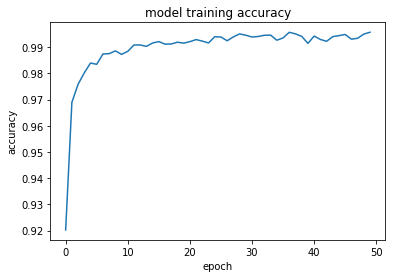

In [35]:
plt.plot(model_out.history["acc"])
plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")